In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('train_NIR5Yl1.csv')
df2=pd.read_csv('test_8i3B3FC.csv')

In [3]:
df1.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
df2.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


#### CHECKING NULL VALUES ,5POINT SUMMARY

In [5]:
print(df1.describe())
print('\n ')
print(df2.describe())

                  ID    Reputation        Answers       Username  \
count  330045.000000  3.300450e+05  330045.000000  330045.000000   
mean   235748.682789  7.773147e+03       3.917672   81442.888803   
std    136039.418471  2.706141e+04       3.579515   49215.100730   
min         1.000000  0.000000e+00       0.000000       0.000000   
25%    117909.000000  2.820000e+02       2.000000   39808.000000   
50%    235699.000000  1.236000e+03       3.000000   79010.000000   
75%    353620.000000  5.118000e+03       5.000000  122559.000000   
max    471493.000000  1.042428e+06      76.000000  175738.000000   

              Views        Upvotes  
count  3.300450e+05  330045.000000  
mean   2.964507e+04     337.505358  
std    8.095646e+04    3592.441135  
min    9.000000e+00       0.000000  
25%    2.594000e+03       8.000000  
50%    8.954000e+03      28.000000  
75%    2.687000e+04     107.000000  
max    5.231058e+06  615278.000000  

 
                  ID    Reputation        Answers  

In [6]:
print(df1.shape)
print(df2.shape)

(330045, 7)
(141448, 6)


In [7]:
print(df1.info())
print('\n')
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 6 columns):
ID            141448 non-null int64
Tag           141448 non-null object
Reputation    141448 non-null float64
Answers       141448 non-null float64
Username      141448 non-null int64
Views         141448 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.5+ MB
None


In [8]:
print(df1.isna().sum())
print('\n')
print(df2.isna().sum())

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64


ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64


### MERGING THE COLUMN FOR DATA READING AND CLEANING

In [9]:
df1['data']='train'
df2['data']='test'

In [10]:
df2['Upvotes']=np.nan


In [11]:
df=pd.concat([df1,df2])

In [12]:
df.head()

,Answers,ID,Reputation,Tag,Upvotes,Username,Views,data
0,2.0,52664,3942.0,a,42.0,155623,7855.0,train
1,12.0,327662,26046.0,a,1175.0,21781,55801.0,train
2,4.0,468453,1358.0,c,60.0,56177,8067.0,train
3,3.0,96996,264.0,a,9.0,168793,27064.0,train
4,4.0,131465,4271.0,c,83.0,112223,13986.0,train


In [13]:
df.shape

(471493, 8)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471493 entries, 0 to 141447
Data columns (total 8 columns):
Answers       471493 non-null float64
ID            471493 non-null int64
Reputation    471493 non-null float64
Tag           471493 non-null object
Upvotes       330045 non-null float64
Username      471493 non-null int64
Views         471493 non-null float64
data          471493 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 32.4+ MB


In [15]:
df.describe(include='all')

,Answers,ID,Reputation,Tag,Upvotes,Username,Views,data
count,471493.000000,471493.000000,4.714930e+05,471493,330045.000000,471493.000000,4.714930e+05,471493
unique,NaN,NaN,NaN,10,NaN,NaN,NaN,2
top,NaN,NaN,NaN,c,NaN,NaN,NaN,train
freq,NaN,NaN,NaN,103251,NaN,NaN,NaN,330045
mean,3.916832,235747.000000,7.817481e+03,NaN,337.505358,81414.491477,2.970545e+04,NaN
std,3.578895,136108.449573,2.731903e+04,NaN,3592.441135,49164.428081,8.077310e+04,NaN
min,0.000000,1.000000,0.000000e+00,NaN,0.000000,0.000000,9.000000e+00,NaN
25%,2.000000,117874.000000,2.830000e+02,NaN,8.000000,39948.000000,2.599000e+03,NaN
50%,3.000000,235747.000000,1.238000e+03,NaN,28.000000,78891.000000,8.961000e+03,NaN
75%,5.000000,353620.000000,5.120000e+03,NaN,107.000000,122455.000000,2.689900e+04,NaN


In [16]:
### EDA

In [17]:
df['Tag'].value_counts()

c    103251
j    103043
p     62120
i     46500
a     45253
s     33411
h     29346
o     20842
r     17755
x      9972
Name: Tag, dtype: int64

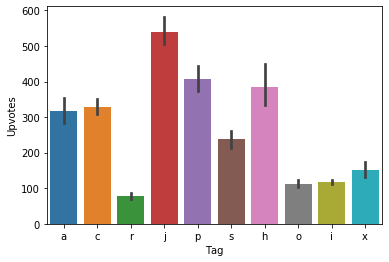

In [18]:
sns.barplot(df['Tag'],df['Upvotes'])
plt.show()

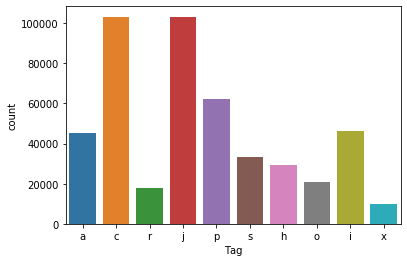

In [19]:
sns.countplot(df['Tag'])
plt.show()

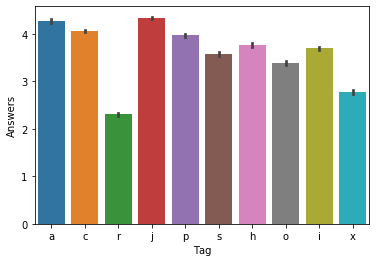

In [20]:
sns.barplot(df['Tag'],df['Answers'])
plt.show()

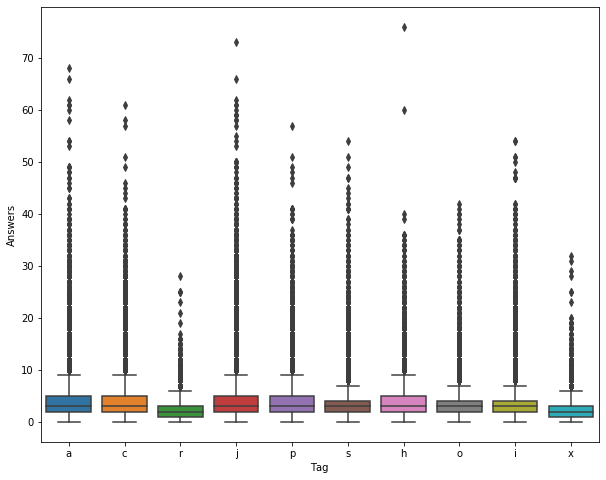

In [21]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Tag'],df['Answers'])

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
df=pd.get_dummies(df,prefix='Tag')

In [24]:
df.head()

,Answers,ID,Reputation,Upvotes,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Tag_test,Tag_train
0,2.0,52664,3942.0,42.0,155623,7855.0,1,0,0,0,0,0,0,0,0,0,0,1
1,12.0,327662,26046.0,1175.0,21781,55801.0,1,0,0,0,0,0,0,0,0,0,0,1
2,4.0,468453,1358.0,60.0,56177,8067.0,0,1,0,0,0,0,0,0,0,0,0,1
3,3.0,96996,264.0,9.0,168793,27064.0,1,0,0,0,0,0,0,0,0,0,0,1
4,4.0,131465,4271.0,83.0,112223,13986.0,0,1,0,0,0,0,0,0,0,0,0,1


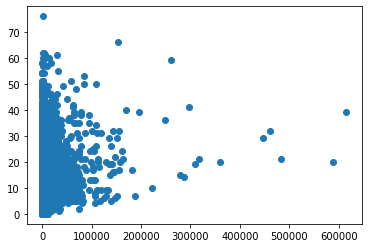

In [25]:
plt.scatter(df['Upvotes'],df['Answers'])

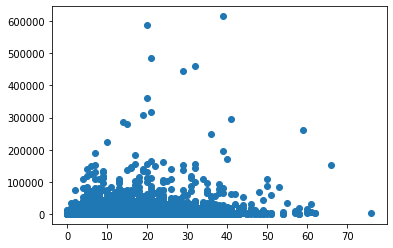

In [26]:
plt.scatter(df['Answers'],df['Upvotes'])

In [27]:
df.tail()

,Answers,ID,Reputation,Upvotes,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Tag_test,Tag_train
141443,4.0,47187,4681.0,NaN,152060,2469.0,0,0,0,0,1,0,0,0,0,0,1,0
141444,3.0,329126,7782.0,NaN,89235,18998.0,0,0,0,0,1,0,0,0,0,0,1,0
141445,5.0,282334,435.0,NaN,119788,57048.0,0,0,0,0,0,0,1,0,0,0,1,0
141446,3.0,386629,176.0,NaN,86824,10193.0,0,0,0,0,0,1,0,0,0,0,1,0
141447,2.0,107271,648.0,NaN,102240,12785.0,1,0,0,0,0,0,0,0,0,0,1,0


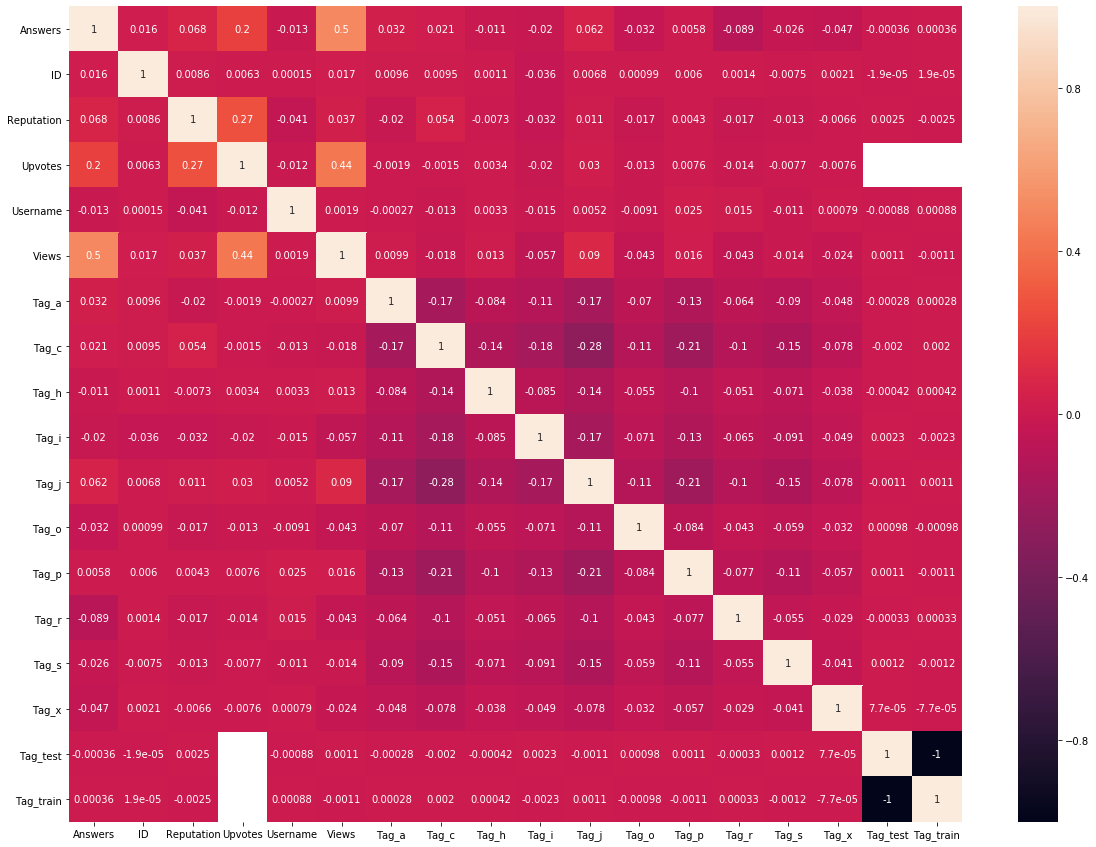

In [28]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [29]:
df1=df[df['Tag_train']==1]
del df1['Tag_train']
del df1['Tag_test']
df2=df[df['Tag_test']==1]
df2=df2.drop(['Tag_test','Tag_train','Upvotes'],axis=1)

In [30]:
df1.head()

,Answers,ID,Reputation,Upvotes,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,2.0,52664,3942.0,42.0,155623,7855.0,1,0,0,0,0,0,0,0,0,0
1,12.0,327662,26046.0,1175.0,21781,55801.0,1,0,0,0,0,0,0,0,0,0
2,4.0,468453,1358.0,60.0,56177,8067.0,0,1,0,0,0,0,0,0,0,0
3,3.0,96996,264.0,9.0,168793,27064.0,1,0,0,0,0,0,0,0,0,0
4,4.0,131465,4271.0,83.0,112223,13986.0,0,1,0,0,0,0,0,0,0,0


In [31]:
df2.head()

,Answers,ID,Reputation,Username,Views,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
0,3.0,366953,5645.0,50652,33200.0,1,0,0,0,0,0,0,0,0,0
1,6.0,71864,24511.0,37685,2730.0,0,1,0,0,0,0,0,0,0,0
2,1.0,141692,927.0,135293,21167.0,0,0,0,1,0,0,0,0,0,0
3,6.0,316833,21.0,166998,18528.0,0,0,0,1,0,0,0,0,0,0
4,10.0,440445,4475.0,53504,57240.0,0,0,0,1,0,0,0,0,0,0


In [32]:
print(df1.shape)
print('\n ')
print(df2.shape)

(330045, 16)

 
(141448, 15)


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [34]:
X=df1.drop('Upvotes',axis=1)
X_STD=sc.fit_transform(X)
X_TEST=sc.fit_transform(df2)

In [35]:
print(X_STD.shape)
print(X_TEST.shape)

(330045, 15)
(141448, 15)


### LINEAR MODEL

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()

In [38]:
X=df1.drop('Upvotes',axis=1)
## we have to take statndrize data
X_STD=sc.fit_transform(X)
y=df1['Upvotes']

In [39]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
pred_lr=lr.predict(df2)
pred_lr

array([ 374.45192786,  267.61551409,  170.57248507, ...,  577.42693027,
       -135.80418616, -156.95602913])

In [41]:
pred_lr=abs(pred_lr)

In [42]:
results = pd.DataFrame({'ID': df2['ID'], 'Upvotes':pred_lr})
results.to_csv("upvotes.csv", index = False)

In [43]:
len(pred_lr)

141448

In [44]:
len(df2['ID'])

141448

In [45]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV

In [46]:
### using lasso

In [47]:
n_alphas = 100
alphas = np.logspace(-10, 0, n_alphas)

lasso_cv = LassoCV(alphas = alphas, cv = 5, random_state = 1)

lasso_cv.fit(X, y)

lasso_cv.alpha_

0.31257158496882353

In [48]:
lasso = Lasso(alpha =0.31257158496882353)

lasso.fit(X , y)

Lasso(alpha=0.31257158496882353, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
lasso_pred = lasso.predict(df2)
lasso_pred

array([ 373.84092209,  269.04645054,  167.48201365, ...,  579.69855985,
       -142.89440485, -157.40352158])

In [50]:
lasso_pred=abs(lasso_pred)

In [51]:
results = pd.DataFrame({'ID': df2['ID'], 'Upvotes':lasso_pred})
results.to_csv("upvotes_lasso.csv", index = False)

In [52]:
## using ridge

In [53]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas)

ridge_cv = RidgeCV(alphas = alphas, cv = 5 )

ridge_cv.fit(X, y)
ridge_cv.alpha_

1000.0

In [54]:
ridge = Ridge(alpha = 1000.0 )

ridge.fit(X, y)

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
ridge_pred = ridge.predict(df2)
ridge_pred

array([ 375.32125621,  268.63509165,  167.79853663, ...,  578.26560956,
       -143.06848035, -155.93979433])

In [56]:
ridge_pred=abs(ridge_pred)

In [57]:
results = pd.DataFrame({'ID': df2['ID'], 'Upvotes':ridge_pred})
results.to_csv("upvotes_ridge.csv", index = False)

### USING OLS MODEL

In [58]:
import statsmodels.api as sm

In [59]:
X=df1.drop('Upvotes',axis=1)
y=df1['Upvotes']

In [60]:
Xc=sm.add_constant(X)

In [61]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     8097.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:25:05   Log-Likelihood:            -3.1215e+06
No. Observations:              330045   AIC:                         6.243e+06
Df Residuals:                  330030   BIC:                         6.243e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Answers      -36.7180      1.751    -20.973      0.000     -40.149     -33.287
ID         -6.619e-05   3.97e-05     -1.667      0.095      -0.000    1.16e-05
Reputation     0.0337      0.000    168.052      0.000       0.033       0.034
Username      -0.0002      0.000     -1.919      0.055      -0.000    4.47e-06
Views          0.0199   7.72e-05    257.676      0.000       0.020       0.020
Tag_a       -331.0614     22.757    -14.547      0.000    -375.665    -286.458
Tag_c       -379.0889     18.530    -20.458      0.000    -415.408    -342.770
Tag_h       -354.2484     25.907    -13.674      0.000    -405.026    -303.471
Tag_i       -207.1682     22.009     -9.413      0.000    -250.304    -164.032
Tag_j       -407.3444     18.668    -21.820      0.000    -443.934    -370.755
Tag_o       -190.4855     29.253     -6.512      0.000    -247.821    -133.150
Tag_p       -344.7106     20.897    -16.496      0.000    -385.668    -303.753
Tag_r       -220.3605     31.014     -7.105      0.000    -281.147    -159.574
Tag_s       -332.5175     24.607    -13.513      0.000    -380.746    -284.289
Tag_x       -252.2170     39.585     -6.372      0.000    -329.802    -174.632
==============================================================================
Omnibus:                  1224101.991   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1678858704147.652
Skew:                          80.743   Prob(JB):                         0.00
Kurtosis:                   11050.900   Cond. No.                     2.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
X=df1.drop(['Upvotes','Username'],axis=1)
y=df1['Upvotes']

In [63]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Upvotes   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     8720.
Date:                Sun, 08 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:25:07   Log-Likelihood:            -3.1215e+06
No. Observations:              330045   AIC:                         6.243e+06
Df Residuals:                  330031   BIC:                         6.243e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Answers      -36.6775      1.751    -20.951      0.000     -40.109     -33.246
ID         -6.621e-05   3.97e-05     -1.668      0.095      -0.000    1.16e-05
Reputation     0.0337      0.000    168.267      0.000       0.033       0.034
Views          0.0199   7.72e-05    257.668      0.000       0.020       0.020
Tag_a       -348.4614     20.874    -16.694      0.000    -389.373    -307.549
Tag_c       -396.3116     16.213    -24.444      0.000    -428.088    -364.535
Tag_h       -371.7330     24.253    -15.327      0.000    -419.268    -324.198
Tag_i       -224.0242     20.180    -11.101      0.000    -263.577    -184.471
Tag_j       -424.8464     16.290    -26.081      0.000    -456.774    -392.919
Tag_o       -207.4474     27.886     -7.439      0.000    -262.104    -152.791
Tag_p       -362.8360     18.642    -19.464      0.000    -399.373    -326.299
Tag_r       -238.4410     29.549     -8.069      0.000    -296.355    -180.527
Tag_s       -349.4311     22.975    -15.209      0.000    -394.461    -304.402
Tag_x       -269.6859     38.524     -7.000      0.000    -345.193    -194.179
==============================================================================
Omnibus:                  1224096.685   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1678789618700.538
Skew:                          80.742   Prob(JB):                         0.00
Kurtosis:                   11050.672   Cond. No.                     2.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
df2_1=df2.drop('Username',axis=1)

In [65]:
pred_ols=model.predict(df2_1)
pred_ols

0          367.889821
1          258.955310
2          182.255764
3          -95.753291
4          669.566496
5         -277.764830
6         -169.913590
7          605.410863
8          -55.117890
9         -428.316887
10        -411.519603
11         123.909685
12        -239.995766
13        2655.111147
14          32.398630
15        9323.490537
16        -219.268079
17          53.723549
18        1148.412100
19        -540.427787
20         -69.937761
21         178.999588
22        -207.777526
23        -421.603428
24        -268.419602
25        -429.636743
26         530.713615
27         302.904685
28        -459.082649
29        -351.682336
             ...     
141418    -193.453601
141419    2764.756243
141420    -111.581985
141421    -365.984421
141422    -233.819074
141423     700.445999
141424    1210.120777
141425    1113.882732
141426     882.288835
141427    -377.623822
141428     159.491011
141429    -293.311532
141430    5399.471580
141431    1289.932043
141432    

In [66]:
pred_ols=abs(pred_ols)

In [67]:
results = pd.DataFrame({'ID': df2['ID'], 'Upvotes':pred_ols})
results.to_csv("upvotes_ols.csv", index = False)

# xboost

In [68]:
import xgboost as xgb

x_dmatrix=xgb.DMatrix(data=X,label=y)

In [69]:
params={"eta"    : 0.1 ,
        'objective':'reg:squarederror',
         "max_depth"        : 8,
         "min_child_weight" : 3, 
         "gamma"            : 10,
         "colsample_bytree" :0.5,
        }

In [70]:
cv_results = xgb.cv(dtrain=x_dmatrix, params=params, nfold=5,
                    num_boost_round=1000,early_stopping_rounds=50,metrics="rmse", as_pandas=True, seed=0)

cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
798,269.192359,23.569569,1576.797510,522.514412
799,269.078803,23.503770,1576.747388,522.554427
800,268.822977,23.487468,1576.699756,522.611990
801,268.713840,23.405524,1576.690625,522.623565
802,268.535590,23.312576,1576.677295,522.625872


In [71]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.1, min_child_weight = 3,
                max_depth = 8, alpha = 1, n_estimators =801 ,gamma=10)

xg_reg.fit(X,y)

[13:02:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=1, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=10, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=801, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=1, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [72]:
y_train_pred1=xg_reg.predict(df2_1)
y_train_pred1

array([204.94098 ,  56.190166,  65.20153 , ...,  98.06745 ,  26.814129,
        39.576633], dtype=float32)

In [73]:
results = pd.DataFrame({'ID': df2['ID'], 'Upvotes':y_train_pred1})
results.to_csv("upvotes_xgb.csv", index = False)

In [74]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.1, min_child_weight = 3,
                max_depth = 8, alpha = 1, n_estimators =805 ,gamma=10)

xg_reg.fit(X,y)

[13:11:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=1, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=10, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=805, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=1, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [75]:
y_train_pred2=xg_reg.predict(df2_1)
y_train_pred2

array([204.92767 ,  56.152546,  65.1669  , ...,  98.086716,  26.760626,
        39.55735 ], dtype=float32)

In [76]:
y_train_pred2=abs(y_train_pred2)

In [77]:
results = pd.DataFrame({'ID': df2['ID'], 'Upvotes':y_train_pred2})
results.to_csv("upvotes_xgb2.csv", index = False)

## RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

In [ ]:
rf=RandomForestRegressor(random_state=0)
param_grid={'criterion':['mse','mae'],'n_estimators':np.arange(1,30)}
GS_rf=GridSearchCV(rf,param_grid,cv=3,scoring='neg_mean_squared_error')
GS_rf.fit(X,y)
GS_rf.best_params_

In [ ]:
NJJOFGXFG

## PCA

In [ ]:
X=df1.drop('Upvotes',axis=1)
y=df1['Upvotes']

In [ ]:
X_STD=sc.fit_transform(X)
X_test=sc.fit_transform(df2)

In [ ]:
df2.corr()

In [ ]:
X.corr()

In [ ]:
X_STD

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()

pca.fit(X_STD)

In [ ]:
pc_score = pca.transform(X_STD)
pc_score.round(2)

In [ ]:
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var * 100, decimals = 1)
exp_var

In [ ]:
pca.explained_variance_.round(3)

In [ ]:
np.cumsum(exp_var)

In [ ]:
labels = ['PC' + str(x) for x in range(1, len(exp_var) + 1)]

plt.figure(figsize = (10,10 ))
plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel('No. of Components')
plt.ylabel('Percentage of explained variance')
plt.title('Scree Plot')
plt.show()

In [ ]:
loadings = pca.components_

loadings.round(2)

In [ ]:
pc_score_df = pd.DataFrame(pc_score, columns = X.columns)
pc_score_df.head()

In [ ]:
pc_score_df.drop(['Tag_r','Tag_s','Tag_x'],axis=1,inplace=True)

In [ ]:
pc_score_df.head()

### building linear model on this

In [ ]:
y=df1['Upvotes']

In [ ]:
lr.fit(pc_score_df,y)

In [ ]:
### making test column as the same sie of train
df23=pd.DataFrame(X_test,columns=df2.columns)
df23.head()
#df2_1=df23.drop(['Tag_r','Tag_s','Tag_x'],axis=1)

In [ ]:
df23.drop(['Tag_r', 'Tag_s', 'Tag_x'],axis=1,inplace=True)

In [ ]:
df23.head()

In [ ]:
pca_pred=lr.predict(df23)
pca_pred

In [ ]:
pca1=abs(pca_pred)

In [ ]:
results = pd.DataFrame({'ID': df2['ID'], 'Upvotes':pca_pred})
results.to_csv("upvotes_pca.csv", index = False)